## Worked Example of K-Means Clustering ##
Taken from "Python Data Science Handbook" (O'Reilly')

### Data Load and Prep ###

In [1]:
# imports and data-load
#import sklearn

import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

#import matplotlib
import matplotlib.pyplot as plt

digits = load_digits()

In [2]:
print(type(digits))
print(type(digits.data))

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>


+ `sklearn.utils.bunch` : "The Bunch object in Scikit-Learn is simply a dictionary that exposes dictionary keys as properties so that you can access them with dot notation" : https://bbengfort.github.io/programmer/2016/04/19/bunch-data-management.html  
+ `numpy.ndarray` : Numpy data array : https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.html  


In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
print(digits.data.shape)
digits.data[0:2]

(1797, 64)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

#### Visualise a random sample from the data ####

<class 'numpy.ndarray'>
(64,)
(8, 8)


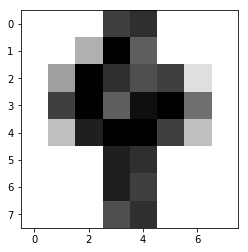

In [8]:
img = digits.data[121]
print(type(img))
print(img.shape)
img = img.reshape((8,8))
print(img.shape)
plt.imshow(img, interpolation = 'nearest', cmap=plt.cm.binary)

In [9]:
digits.target[121]

4

## Create a K-Means Cluster ##
Pre-emptively guess the number of clusters we want (10).

We can do this because we know  a lot about the data-set and can make some assumptions.

In [11]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

kmeans.cluster_centers_.shape

(10, 64)

10 clusters and * each cluster is a 64 dimensional point *.

#### Visualise the clustering results ####
Use `matplotlib.pyplot` to plot the 10 centroids using the 64 dimensions to represent image pixels

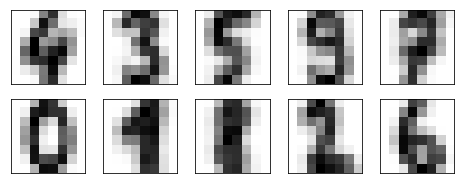

In [12]:
fig, ax = plt.subplots(2,5, figsize=(8,3))
#NOTE - kept the American spelling for center
centers = kmeans.cluster_centers_.reshape(10,8,8)  # take our ten clusters and make each one into an 8x8 array#
# for each 8x8 array in "centers", do a plot in our 2 x 5 plt array
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation = 'nearest', cmap=plt.cm.binary)


In [13]:
#centers[0]

## Checking the Accuracy ##

#### Match each learned cluster with the true labels ####

In [14]:
#Our dataset helpfully has the actual digits stored in digits.target
print(digits.target.shape)
print(digits.target[0:21])

(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0]


In [15]:
from scipy.stats import mode  # "Return an array of the modal (most common) value in the passed array"

labels = np.zeros_like(clusters)  #just an array of zeros
for i in range(10):
    mask = (clusters == i )  # find all the cluster items labeled "i" - Boolean array
    
    #set all the labels matching the Boolean Array index to the most popular digit label in this cluster 
    labels[mask] = mode(digits.target[mask])[0] 

In [16]:
mask

array([False, False, False, ..., False, False, False])

In [ ]:
##mode(digits.target[mask])[0]

In [ ]:
#### Compare the original **Target** labels with the **Estimate** labels ####

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

79% accuracy is not bad...

#### Display classification accuracy with a Confusion Matrix ####

[Text(92.68,0.5,'Predicted Label')]

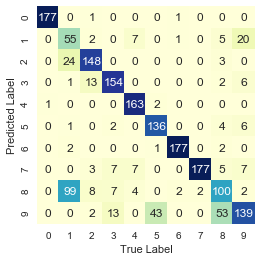

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
m = confusion_matrix(digits.target, labels)
ax = sns.heatmap(m.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=False
            , xticklabels=digits.target_names
            , yticklabels=digits.target_names)

ax.set(xlabel='True Label')
ax.set(ylabel='Predicted Label')

In [19]:
m

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,  55,  24,   1,   0,   1,   2,   0,  99,   0],
       [  1,   2, 148,  13,   0,   0,   0,   3,   8,   2],
       [  0,   0,   0, 154,   0,   2,   0,   7,   7,  13],
       [  0,   7,   0,   0, 163,   0,   0,   7,   4,   0],
       [  0,   0,   0,   0,   2, 136,   1,   0,   0,  43],
       [  1,   1,   0,   0,   0,   0, 177,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0, 177,   2,   0],
       [  0,   5,   3,   2,   0,   4,   2,   5, 100,  53],
       [  0,  20,   0,   6,   0,   6,   0,   7,   2, 139]], dtype=int64)

In [20]:
mperc = np.true_divide(m, m.sum(axis=1, keepdims=True))
mperc = np.round(mperc,2) * 100
mperc.astype(int)

array([[99,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 30, 13,  1,  0,  1,  1,  0, 54,  0],
       [ 1,  1, 84,  7,  0,  0,  0,  2,  5,  1],
       [ 0,  0,  0, 84,  0,  1,  0,  4,  4,  7],
       [ 0,  4,  0,  0, 90,  0,  0,  4,  2,  0],
       [ 0,  0,  0,  0,  1, 75,  1,  0,  0, 24],
       [ 1,  1,  0,  0,  0,  0, 98,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 99,  1,  0],
       [ 0,  3,  2,  1,  0,  2,  1,  3, 56, 30],
       [ 0, 11,  0,  3,  0,  3,  0,  4,  1, 77]])

In [21]:
mperc

array([[99.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 30., 13.,  1.,  0.,  1.,  1.,  0., 54.,  0.],
       [ 1.,  1., 84.,  7.,  0.,  0.,  0.,  2.,  5.,  1.],
       [ 0.,  0.,  0., 84.,  0.,  1.,  0.,  4.,  4.,  7.],
       [ 0.,  4.,  0.,  0., 90.,  0.,  0.,  4.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 75.,  1.,  0.,  0., 24.],
       [ 1.,  1.,  0.,  0.,  0.,  0., 98.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 99.,  1.,  0.],
       [ 0.,  3.,  2.,  1.,  0.,  2.,  1.,  3., 57., 30.],
       [ 0., 11.,  0.,  3.,  0.,  3.,  0.,  4.,  1., 77.]])

[Text(92.68,0.5,'Predicted Label')]

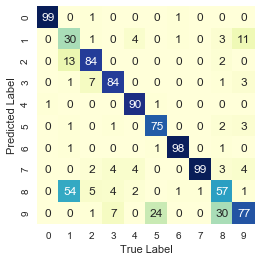

In [22]:
ax = sns.heatmap(mperc.T, square=True, annot=True, cmap="YlGnBu", cbar=False
            , xticklabels=digits.target_names
            , yticklabels=digits.target_names)

ax.set(xlabel='True Label')
ax.set(ylabel='Predicted Label')